# LOGISTIC REGRESSION



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


### My own regression model

In [111]:
class LogisticRegression :
    
    def show( self ) :
        print("W --> ",str(w))
        print("b --> ",str(b))
        
    def initialize( self ) :
        self.w = 0.01 * np.random.randn( self.features , 1 )
        self.b = 0
        
    def sigmoid( self , z ) :
        return 1/( 1 + np.exp(-z) )
    
    def backprop( self , x , a , y ) :
        dz = a - y
        dw = (1/self.m) * np.dot( x , (dz).T )
        db = (1/self.m) * np.sum( dz )
        cost= ( -1/self.m ) * np.sum( y*np.log(a) + (1-y)*np.log(1-a) )
        cost = np.squeeze( cost )
        assert ( cost.shape == () )
        return dw , db , cost
    
    def propagate( self , x , y , iterations , learning_rate , printCost ) :
        self.costs = []
        for i in range( iterations ) :
            
            #Forward Propagation
            z = np.dot( (self.w).T , x ) + self.b
            a = self.sigmoid( z )
            #Backward Propagation
            
            dw , db , cost = self.backprop( x , a , y )
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            (self.costs).append(cost)
            if i%1000 == 0 and printCost :
                print("Cost after ",i," iterations : ",cost)
        
    def visualize( self , x , y , y_predict ) :
        x = x.T
        y = np.squeeze(y.T)
        y_predict = np.squeeze(y_predict.T)
        
        from matplotlib.colors import ListedColormap
        X_set, y_set = x, y
        X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
        plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.75, cmap = ListedColormap(('red', 'green')))
        plt.xlim(X1.min(), X1.max())
        plt.ylim(X2.min(), X2.max())
        for i, j in enumerate(np.unique(y_set)):
            plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                        c = ListedColormap(('red', 'green'))(i), label = j)
        plt.title('Logistic Regression (Test set)')
        plt.xlabel('Age')
        plt.ylabel('Estimated Salary')
        plt.legend()
        plt.show()

        
    def plot(self) :
        plt.plot(self.costs)
        plt.ylabel('Cost')
        plt.xlabel('Iterations')
        plt.title("Learning rate =" + str(self.rate))
        plt.show()
        
    def predict( self , x , y , visualize = False) :
        z = np.dot( (self.w).T , x ) + self.b
        y_prediction = np.zeros( z.shape )
        
        for i in range( z.shape[1] ) :
            if z[0][i] >= 0 :
                y_prediction[0][i] = 1
            else :
                y_prediction[0][i] = 0

        acc = 100 - np.mean( 100 * np.abs( y - y_prediction ) )
        print( acc , "%")
        
        if visualize :
            self.visualize( x , y , y_prediction )
        
        
    def fit( self , x , y , iterations = 1000 , learning_rate = 0.001 , printCost = True , plot = True) :
        self.rate = learning_rate
        self.features = x.shape[0]
        self.m = x.shape[1]
        self.initialize()
        self.propagate( x , y , iterations , learning_rate , printCost )
        if plot :
            self.plot()

### Main Function :

**Data Preprocessing**

In [53]:
dataset = pd.read_csv('social.csv')

In [54]:
# dataset.describe()

In [55]:
y = dataset['Purchased']

In [56]:
x = dataset.drop( ['User ID','Purchased','Gender'] , axis = 1 )

In [57]:
x = np.array(x)
y = np.array(y).reshape(400,1)
x = x.T
y = y.T 
print( x.shape , y.shape)

(2, 400) (1, 400)


In [58]:
# Mean Normalization
mean = np.mean( x , keepdims = True , axis = 1 )
x = x - mean
variance = np.var( x , keepdims = True , axis = 1 )
x = x / variance

In [59]:
x_train = x[ : , : 300 ]
x_test = x[ : , 300 : ]
y_train = y[ : , : 300 ]
y_test = y[ : , 300 : ]
print( x_train.shape  , x_test.shape , y_train.shape , y_test.shape)

(2, 300) (2, 100) (1, 300) (1, 100)


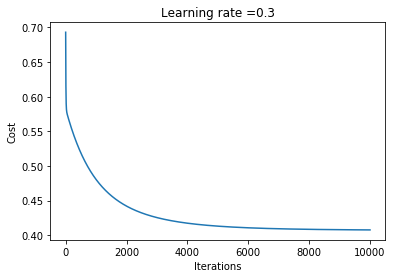

In [115]:
clf = LogisticRegression()
clf.fit( x_train , y_train , iterations = 10000 , learning_rate = 0.3 , printCost = False , plot = True)

For training set : 
83.0 %
Ho gaya squeeze
(300, 2) (300,) (300,)


ValueError: x and y must be the same size

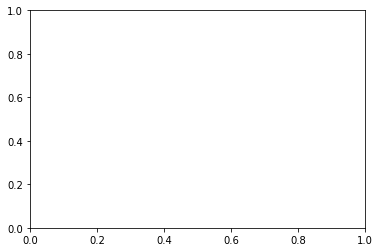

In [113]:
print("For training set : ")
clf.predict( x_train , y_train , visualize = True )

In [114]:
print("For test set : ")
clf.predict( x_test , y_test)

For test set : 
79.0 %
